# Classification

The goal of regression was to predict a continuous value whereas the goal of classification is to predict a discrete value or label and represent a particular class from the features of given data. 

Example:

- Predicting if an image is of a **cat** or a **dog**,
- Predicting if a customer will **buy a product** or **not**,
- Classifying an email is **spam** or **not**,
- Classifying whether the text message is **positive** or **negative**,
- Gender Classification (**Male** or **Female**). 

Here, one label is represented using discrete value **1** and other as **0**.

# Logistic Regression

**Logistic regression** is a popular statistical model used for **binary classification** problems. It aims to estimate the probability that an instance belongs to a particular class. The model assumes a linear relationship between the predictors and the log-odds of the event occurring.

> **Assumption:** Classes are almost perfectly linerarly separable.

## Sigmoid Function

In Logistic Regression, the output of the linear regression $\hat{y}$ is passed to a fucntion known as sigmoid function which is defined as:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

The sigmoid function takes any real number $z$ as input and outputs a value between **0** and **1**.  As, logistic takes **linear regresion** as input to classify. We can conclude $z=\beta_0 + \beta_1 x$. So final output of logistic regression becomes:

$$\therefore p(x) = \sigma(z) = \frac 1 {1 + e^{-z}} = \frac 1 {1 + e^{-(\beta_0 + \beta_1x)}}$$

Here, 
- $p(x)$ is the probability of the input $x$ belonging to the positive class,
- $1 - p(x)$ is the probability of the input $x$ belonging to the negative class.



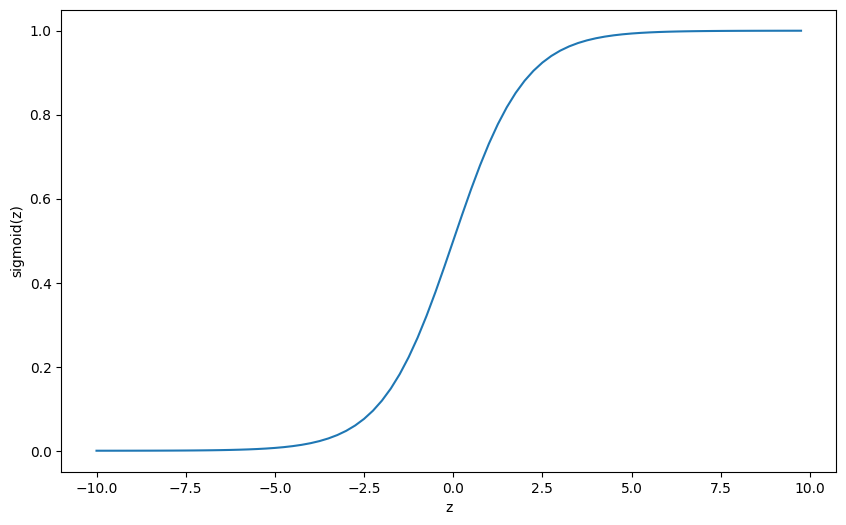

In [144]:
import numpy as np 
import matplotlib.pyplot as plt

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# List of points from range -10 to 10 at interval of .25 
z = np.arange(-10, 10, .25)

# Plot sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("sigmoid(z)")

plt.show()

## Synthetic Dataset

Let's create a simple synthetic dataset that contains two features: `hours_studied` and `attendance_percentage` with binary target **pass_exam**(1) and **fail_exam**(0) indicating whether students passed the exam or not.

In [145]:
# Import necessary library to create a synthetic dataset
import pandas as pd 
import numpy as np
from sklearn.datasets import make_classification

# Create a function for sythetic dataset
def generate_synthetic_data(n_samples=100, random_seed=42):
    X, y = make_classification(n_samples=n_samples,      # Number of samples to generate
                               n_features=2,             # Total number of features
                               n_informative=2,          # Number of informative features
                               n_redundant=0,            # Number of redundant features (linear combinations of informative features)
                               n_classes=2,              # Number of classes (binary classification)
                               n_clusters_per_class=1,   # Number of clusters per class
                               class_sep=0.9, 
                               random_state=random_seed) # Seed for random number generation
    
    # Hours_studied: range from 0 to 8
    X[:, 0] = (X[:, 0] - X[:, 0].min()) / (X[:, 0].max() - X[:, 0].min()) * 8   
    # Attendance_percentage: range from 40% to 90%
    X[:, 1] = (X[:, 1] - X[:, 1].min()) / (X[:, 1].max() - X[:, 1].min()) * 0.60 + 0.30  

    # Create a DataFrame
    df = pd.DataFrame(X, columns=['hours_studied', 'attendance_percentage'])
    df['pass_exam'] = y
    
    return df

# Generate synthetic dataset
synthetic_data = generate_synthetic_data()
synthetic_data.head()

,hours_studied,attendance_percentage,pass_exam
0,4.139644,0.479490,0
1,3.088478,0.405227,0
2,6.759124,0.844110,1
3,2.840853,0.408483,0
4,2.865295,0.410333,0


In [146]:
synthetic_data.describe()

,hours_studied,attendance_percentage,pass_exam
count,100.000000,100.000000,100.000000
mean,3.742687,0.559803,0.500000
std,1.573304,0.143193,0.502519
min,0.000000,0.300000,0.000000
25%,2.832414,0.437561,0.000000
50%,3.572108,0.526466,0.500000
75%,4.564755,0.665868,1.000000
max,8.000000,0.900000,1.000000


> Note: Its a simple synthetic data. It doesn't represent the actual real life scenario.

In [147]:
# Extract features and target variable
X = synthetic_data[['hours_studied', 'attendance_percentage']].values
y = synthetic_data['pass_exam'].values

In [148]:
from sklearn.linear_model import LogisticRegression

# Fit logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)

LogisticRegression()

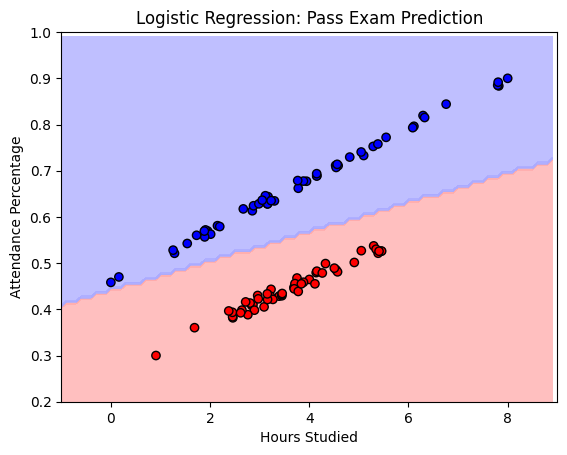

In [149]:
from matplotlib.colors import ListedColormap

# Create a meshgrid of hours_studied and attendance_percentage
X1_min, X1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
X2_min, X2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
X1_mesh, X2_mesh = np.meshgrid(np.arange(X1_min, X1_max, 0.1),
                               np.arange(X2_min, X2_max, 0.01))

# Classify each point in the meshgrid
input_mesh = np.array([X1_mesh.ravel(), X2_mesh.ravel()]).T
label_mesh = logistic_regression.predict(input_mesh)

# Plot the decision boundary for the entire mesh
plt.contourf(X1_mesh, X2_mesh, label_mesh.reshape(X1_mesh.shape), alpha=0.75, cmap=ListedColormap(('#FFAAAA', '#AAAAFF')))

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(('red', 'blue')))
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)

# Titles and labels
plt.title('Logistic Regression: Pass Exam Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Attendance Percentage')
plt.show()

In above plot, the straight line which separates the **red region where y = 0** and the **blue region where y = 1** is called the **decision boundary**.

In [150]:
# Predictions for new data points
class_label_student1 = logistic_regression.predict([[8, 0.85]])
probability_student1 = logistic_regression.predict_proba([[8, 0.85]])
print("The predicted class label for a student who studied 8 hours and had 85% attendance is:", class_label_student1)
print("Probabilities:", probability_student1)

The predicted class label for a student who studied 8 hours and had 85% attendance is: [1]
Probabilities: [[0.34338129 0.65661871]]


In [151]:
class_label_student2 = logistic_regression.predict([[1, 0.30]])
probability_student2 = logistic_regression.predict_proba([[1, 0.30]])
print("The predicted class label for a student who studied 1 hour and had 30% attendance is:", class_label_student2)
print("Probabilities:", probability_student2)

The predicted class label for a student who studied 1 hour and had 30% attendance is: [0]
Probabilities: [[0.67210055 0.32789945]]
